<a href="https://colab.research.google.com/github/tbrown2695/Project-Python-IQ/blob/main/IQ%2BProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IQ Level Analysis
Author: Tye Brown

**Executive Summary**

This project uses python to analyze to determine if factors such as higher income or increased education expenditure would cause higher IQ scores.  The hypothisis is, higher education and/or higher income indicate higher IQ scores.  

Peliminary findings:

In reviewing the averge income to IQ we note the lowest scores are where average income is less then 20k.  Further observation shows the higher scores are in the 40-70k range. Income higher then than this does not produce highter IQ scores. Thus the finding in comparrison is some income does increase the IQ score, however there is a diminishing return once income increases outside of the normal distribution or bell shape of the sample range.  

A comparrison of the education expenditure to IQ shows similar results.  Low education expenditure is consistent with low IQ scores. higher expenditure in the 1500 to 4000 range produces the highest scores.  The highest expenditure produces the same diminishing returns where more resources does not contribute to higher scores.       

In this report
1.  Executive summary with the scope and purpose of the study
2.  A step by step format to detail the collection, processing, and analytical techniques used.  
3.  Summary of the key findings

This project will look at the value personal income or educational investment corralation to IQ scores.   










# Data Description

1. Dataset Overview
    The source of this data was Kaggle.com.  The dataset name is IQ_level
2. Key Features
    The dataset has 108 rows and 6 columns
3. Descriptive Statistics
4. Data Size and Structure
5. Missing or Anomalous Data
6. Data Cleaning and Preprocessing

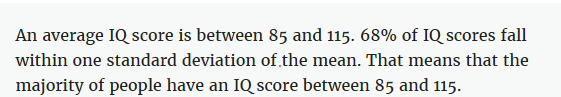

https://www.google.com/url?q=https%3A%2F%2Fwww.verywellmind.com%2Fwhat-is-a-genius-iq-score-2795585

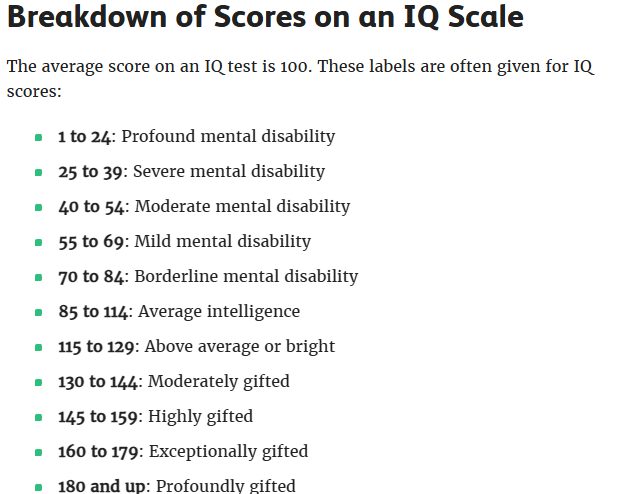

https://www.www.verywellmind.com%2Fwhat-is-a-genius-iq-score-2795585

In [1]:
# Connect to data source

from google.colab import drive
try:
  drive.mount('/content/drive') # Mount Google Drive
except ValueError:
# If mounting fails, print an error message and suggest a solution
  print("Drive mounting failed. Please ensure you are authenticated and have a stable internet connection.")
  print("You may need to manually authorize by clicking the link and entering the authorization code.")


# Optional: Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


In [2]:
# Import libraires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings #Recommend at least running final code once with this block of
#code
warnings.simplefilter(action='ignore', category=FutureWarning)


# **Key Functions**

In [3]:
# Dataframe updates and functions

def null_finder_drop(dataframe=None, max_num_null = 0):

  """
  Function which accept a pandas dataframe and max_nul_null ceiling value
  to find and fill NA values within a dataframe.

  Inputs:
  dataframe (obj) = Pandas dataframe
  max_num_null (int) = threshold value for maximumn number of NA values
  the dataframe can have without the need for visual inspection

  Returns:
  df (cleaned) = Dataframe that had NA values below threshold which were dropped
  df (original) = Original dataframe with NA values above threshold and needs
  to be visually inspected
  """

  # Create variables to track na values

  above_max_number_null = [] # Empty list to track column names with too many null values
  above_max_number_null_value = [] # Track the actually number of nulls

  # Null Value Finder - Find the null values for each column and compare them
  # to a threshold

  for col in df.columns:
    print('There are {0} null values in {1} column.'.format(df[col].isnull().sum(),col))
    print('*' * 50)
    if df[col].isnull().sum() > max_num_null: # Check - are there any column withtoo many nulls?

      above_max_number_null.append(col) # Yes - append name
      above_max_number_null_value.append(df[col].isnull().sum()) # Yes - append how many

  #Check if the above_max_number_value list is empty

  if not above_max_number_null_value:
    print('Dropping NA values (if any)...')
    return df.dropna() # We do not have any above our threshold, good to drop
  else:
    print('Too many null values in the following columns: {}. Please go back and inspect those columns'.format(above_max_number_null)) # Go back, and inspect
    return df

# This function will search for and return duplicates located within a dataframe.

def duplicate_checker(df):

  duplicates = df.duplicated().sum()

  if duplicates > 0:
    return df.drop_duplicates()
  else:
    return df

# This histplot function will create a histogram for each column in a dataframe.

def histplot_function(df):
    for column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.show()

# This function will return the first, third, and interquartile range of a specificed column within a dataframe.  The column will need to be called with the function.

def quantile_function(df, column_name= None):
  Q1 = df[column_name].quantile(.25)
  Q3 = df[column_name].quantile(.75)
  IQR = Q3 - Q1
  print(f"Q1: {Q1}")
  print(f"Q3: {Q3}")
  print(f"IQR: {IQR}")
  return Q1, Q3, IQR

# This boxplot function will create a boxplot for each column in a dataframe.

def boxplot_function(df):
    for column in df.columns:
      sns.boxplot(df[column])
      plt.show()

# This boxplot function accepts varialbes to visualize specific columns

def boxplot_function_variables(df, x_axis_var="", y_axis_var=""):
      sns.boxplot(data=df, x=x_axis_var, y=y_axis_var, hue = "IQ", palette = 'coolwarm')
      plt.xlabel(x_axis_var)
      plt.ylabel(y_axis_var)
      plt.title(f'Boxplot of {x_axis_var} vs {y_axis_var}')
      plt.show()

# This scatter plot function will create a scatterplot for each column in a dataframe

def scatter_plotter(dataframe, x_axis_var = ""):
  for col in dataframe.columns:
    if col != x_axis_var:
      sns.scatterplot(data=df, x=x_axis_var, y=col, hue = "IQ", palette = 'coolwarm')
      plt.show()
  return


## This scatter plot function will create a scatterplot for selected variables

def scatter_plotter_variables(df, x_axis_var = "", y_axis_var = ""):
        sns.scatterplot(data=df, x=x_axis_var, y=y_axis_var, hue = "IQ", palette = "coolwarm")
        plt.xlabel(x_axis_var)
        plt.ylabel(y_axis_var)
        plt.title(f'Scatterplot of {x_axis_var} vs {y_axis_var}')
        plt.show()


# first function created

def histplot_column_function(df, hue_var = ""):
    for column in df.columns:
      if column != hue_var:
        plt.figure(figsize=(10, 6))
        sns.histplot(df, x=column, hue=hue_var, legend = False, palette = "coolwarm")
        plt.xlabel(column)
        plt.title(f'Histogram of {column} with Hue: {hue_var}')
        plt.show()

# This function will create a Pairplot to compare columns within the dataframe.

def pairplot_function(df, hue_var = ""):
    pairplot = sns.pairplot(df, hue = hue_var, palette = "coolwarm")
    pairplot.fig.suptitle(f'Pair Plot with Hue: {hue_var}', y=1.02)  # Add title with correct positioning
    plt.show()

# This function will calculate the correlations within the dataframe

def corr_function(df):
  return corr_df.corr()

# This function will create a countplot for a specified column in a dataframe.

plt.figure(figsize=(15, 6))
def countplot_function_variable(df, x_axis_var = ""):
  return sns.countplot(data=df, x=x_axis_var)

def boxplot_function_hue(df):
    for column in df.columns:
        if column != 'IQ':  # Assuming 'IQ' should be the hue column
            plt.figure(figsize=(10, 6))
            sns.boxplot(y=column, x='IQ', data=df, palette='coolwarm')
            plt.title(f'Boxplot of {column} with Hue for IQ')



<Figure size 1500x600 with 0 Axes>

# **Step 1: Load Data | Data Inspection | Summary Statisics**

In this step the data is loaded and exploritory data analysis is performed.   



In [17]:
# Load data and view top five rows

data = pd.read_csv('/content/drive/My Drive/IQ_level.csv')

df = data.copy() #Good for later analysis, etc...


In [18]:
# Rename Columns
df.rename(columns={'rank': 'Rank', 'country': 'Country', 'education_expenditure': 'Education Expenditure', 'avg_income': 'Average Income', 'avg_temp': 'Average Temperature'}, inplace=True)

# Convert average temperature from celsius to fahrenheit
df["Average Temperature"] = (df["Average Temperature"] * 1.8) + 32

In [19]:
#View first 5 rows

df.head()

,Rank,Country,IQ,Education Expenditure,Average Income,Average Temperature
0,1,Hong Kong,106,1283.0,35304.0,79.16
1,2,Japan,106,1340.0,40964.0,66.56
2,3,Singapore,106,1428.0,41100.0,88.70
3,4,Taiwan,106,NaN,NaN,80.42
4,5,China,104,183.0,4654.0,66.38


In [46]:
num_rows, num_columns = data.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 108 rows and 6 columns.


In [7]:
# get data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   108 non-null    int64  
 1   Country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   Education Expenditure  103 non-null    float64
 4   Average Income         106 non-null    float64
 5   Average Temperature    108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


In [8]:
# Get summary statistics.

df.describe()

,Rank,IQ,Education Expenditure,Average Income,Average Temperature
count,108.00000,108.000000,103.000000,106.000000,108.000000
mean,54.50000,85.972222,903.058252,17174.650943,74.945000
std,31.32092,12.998532,1166.625835,20871.092773,15.106017
min,1.00000,51.000000,1.000000,316.000000,32.720000
25%,27.75000,78.750000,81.500000,2263.250000,63.050000
50%,54.50000,88.000000,336.000000,7533.000000,78.530000
75%,81.25000,97.000000,1360.000000,30040.000000,88.295000
max,108.00000,106.000000,5436.000000,108349.000000,97.700000


# **Step 2: Handle Missing Values**

In this step missing values are identifed.  Then it is determined if the missing values are a factor in the analysis.  The missing values are filled in with an average of the data within the column.  
---

**Univariate Analysis**
- Objective: Dive deeper into the distribution of individual features.
- Activity:
Plot histograms or density plots for numerical variables.
Explore box plots to visualize potential outliers.
Discuss distribution shapes (e.g., normal, skewed) and their implications.

In [9]:
# Check to see if null values exist.

df.isnull().sum()

,0
Rank,0
Country,0
IQ,0
Education Expenditure,5
Average Income,2
Average Temperature,0


In [20]:
# Identify which columns contain null values.

df = null_finder_drop(df, max_num_null=100)

There are 0 null values in Rank column.
**************************************************
There are 0 null values in Country column.
**************************************************
There are 0 null values in IQ column.
**************************************************
There are 5 null values in Education Expenditure column.
**************************************************
There are 2 null values in Average Income column.
**************************************************
There are 0 null values in Average Temperature column.
**************************************************
Dropping NA values (if any)...


Filling Null Values

In [10]:
# Fill null values for the Education Expenditure column with median values.

df['Education Expenditure'].fillna(df['Education Expenditure'].median(), inplace = True)
df['Education Expenditure']

,Education Expenditure
0,1283.0
1,1340.0
2,1428.0
3,336.0
4,183.0
...,...
103,336.0
104,14.0
105,92.0
106,16.0


In [21]:
# Fill null values for the Average Income column with median values.

df['Average Income'].fillna(df['Average Income'].median(), inplace=True)
df['Average Income']

,Average Income
0,35304.0
1,40964.0
2,41100.0
4,4654.0
5,22805.0
...,...
102,1289.0
104,648.0
105,2830.0
106,412.0


# **Step 3: Check for Duplicates**

Here we search for duplicate records within the dataframe

---



In [22]:
# Check dataframe to see if there are any duplicates. None were found.

df.duplicated().sum()

df = duplicate_checker(df)

# **Step 4: Univariate Analysis**
- Main idea: Analyze the distribution of each feature.  Look at the range to see how it's distributed and visually represented.
                                                      
**Univariate Analysis**
- Objective: Dive deeper into the distribution of individual features.
- Activity:
Plot histograms or density plots for numerical variables.
Explore box plots to visualize potential outliers.
Discuss distribution shapes (e.g., normal, skewed) and their implications.                                                       

- Main questions:
  - How is the feature distributed?
  - What are the implications?
  - Why could it be distributed that why?

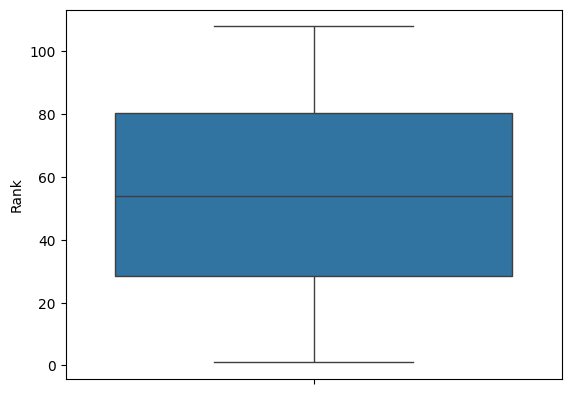

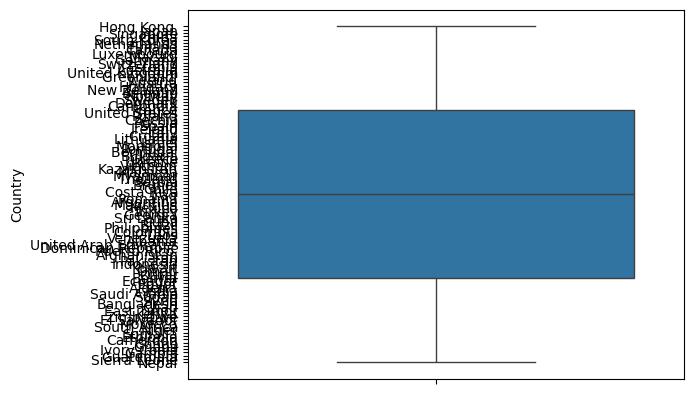

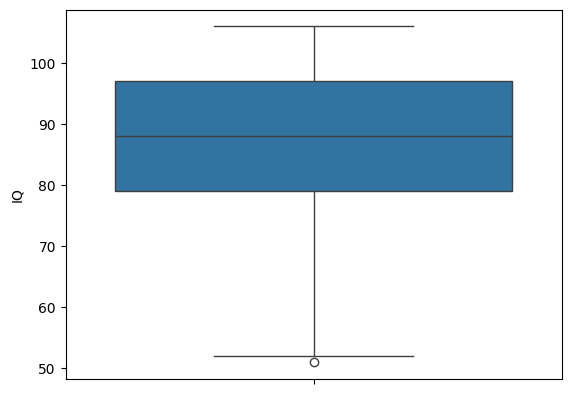

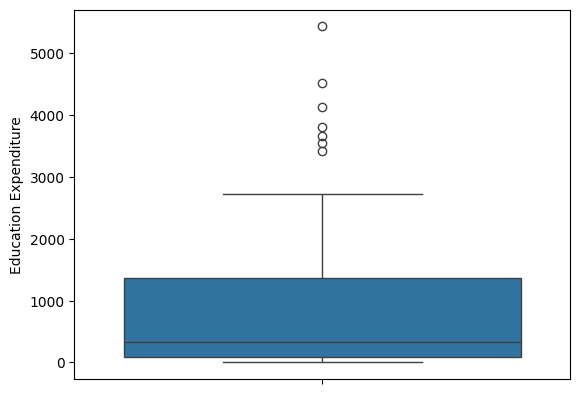

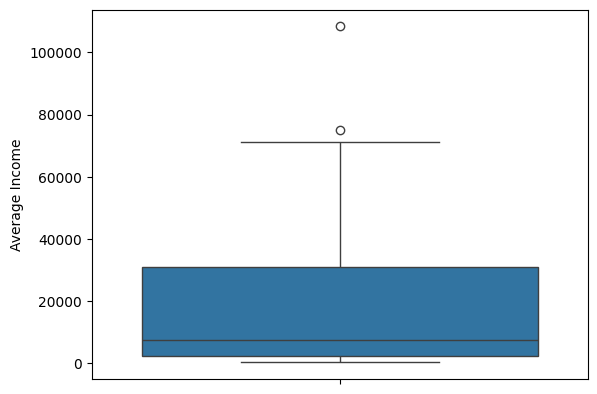

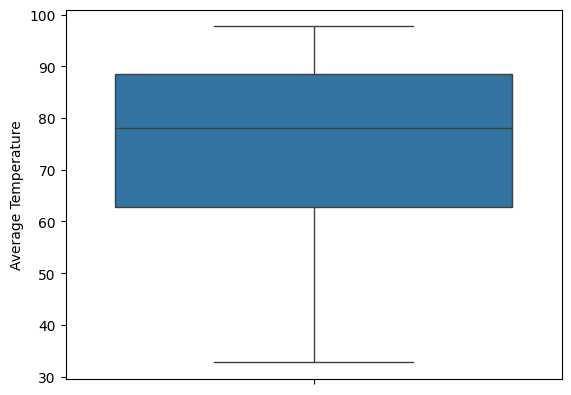

In [23]:
# Boxplot visuals to see the column ranges and check for outliers.

boxplot_function(df)

# **Step 5: Bivariate Analysis | Multivariate Analysis**

*Bivariate Analysis*
- Scatterplots (numerical to numerical)
- Box plots (Categorical to numerical)
- Cross tabulation (Categorical to Categorical)

*Multivariate Analysis*
- Pairplots
- heat maps (us df.corr() then create a heat map of correlations)
-

**Exploring Categorical Variables**
- Plot bar charts for the distribution of categories.
- Explore relationships between categorical and numerical variables (e.g., boxplots, violin plots).

** Correlation Analyis**

- Plot a correlation matrix using a heatmap.
- Discuss how to interpret correlation coefficients (e.g., positive, negative, and no correlation).


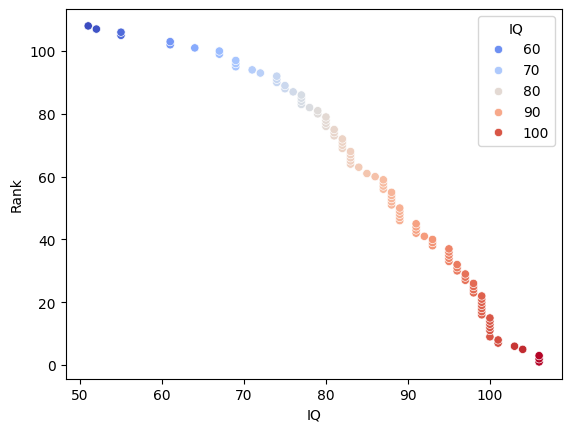

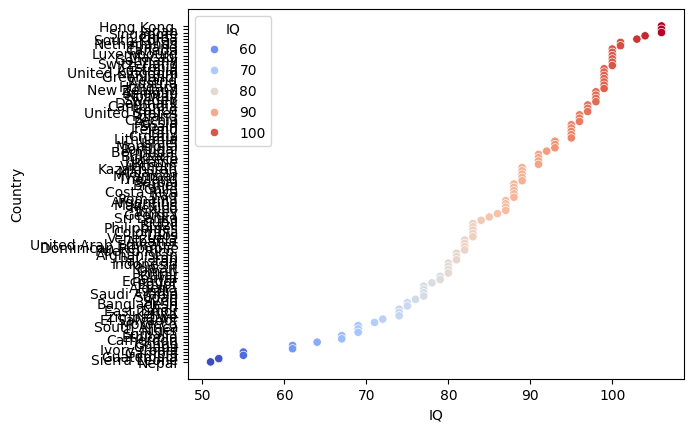

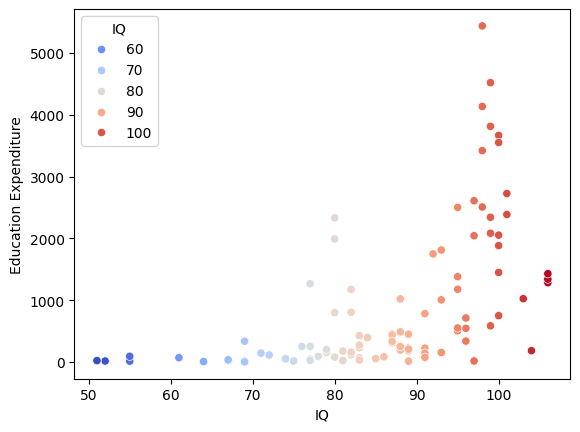

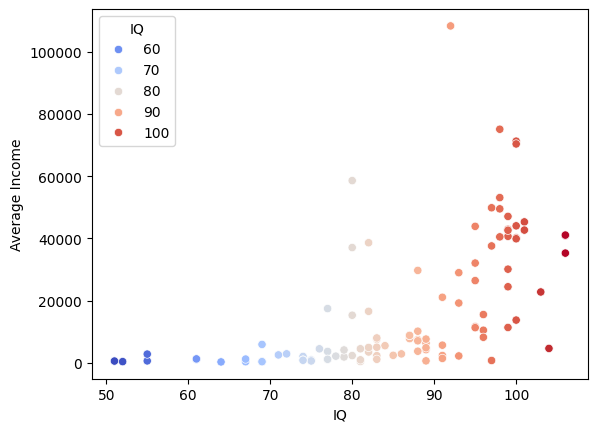

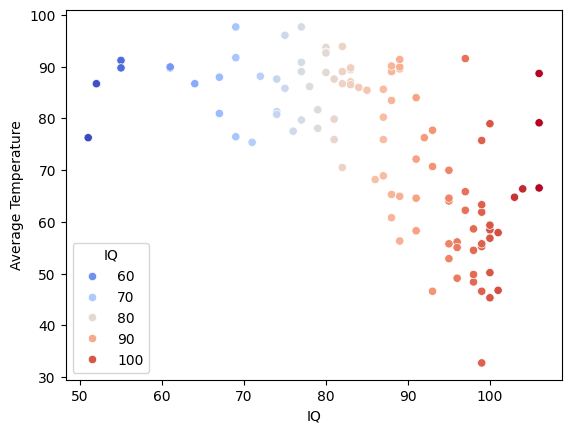

In [24]:
# Scatter plot for each column to visualize the distribution via the IQ.

scatter_plotter(df, "IQ")

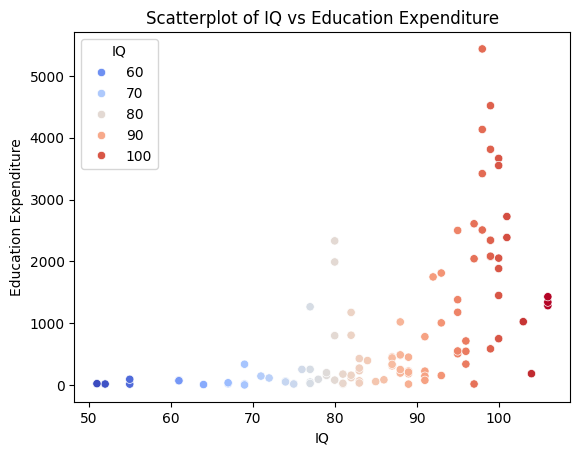

In [25]:
# A second look at the education expenditure and IQ.

scatter_plotter_variables(df, "IQ", "Education Expenditure")

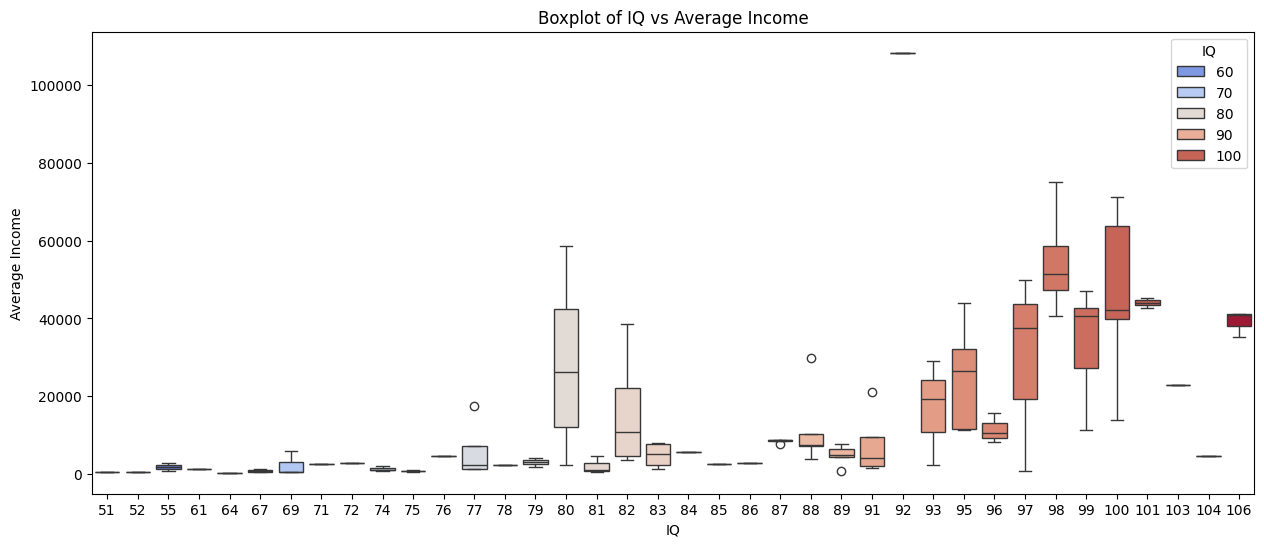

In [26]:
# A boxplot look at the average income and IQ score.

plt.figure(figsize=(15, 6))
boxplot_function_variables(df, "IQ", "Average Income")

<Axes: xlabel='IQ', ylabel='count'>

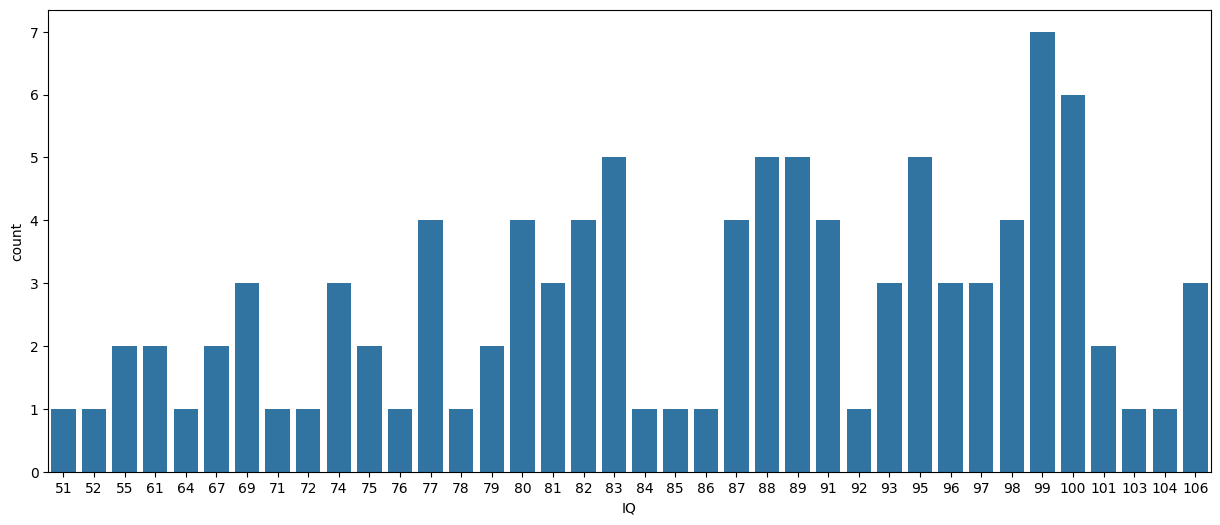

In [27]:
# A boxplot look at count per IQ score.

plt.figure(figsize=(15, 6))
countplot_function_variable(df, "IQ")

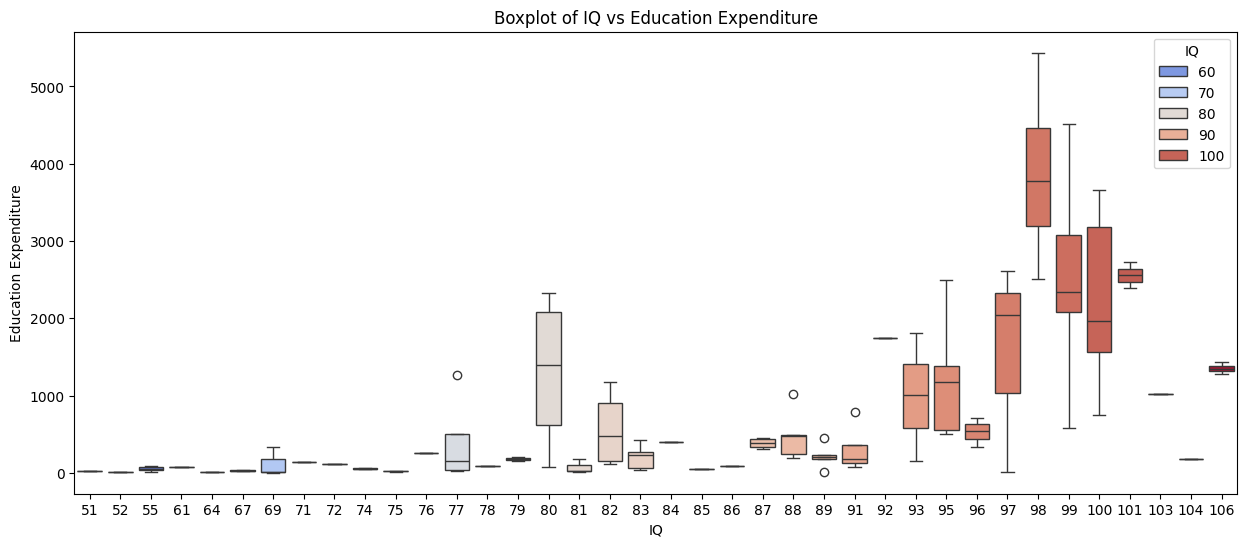

In [28]:
# A boxplot look at education expenditire and IQ score.

plt.figure(figsize=(15, 6))
boxplot_function_variables(df, "IQ", "Education Expenditure")

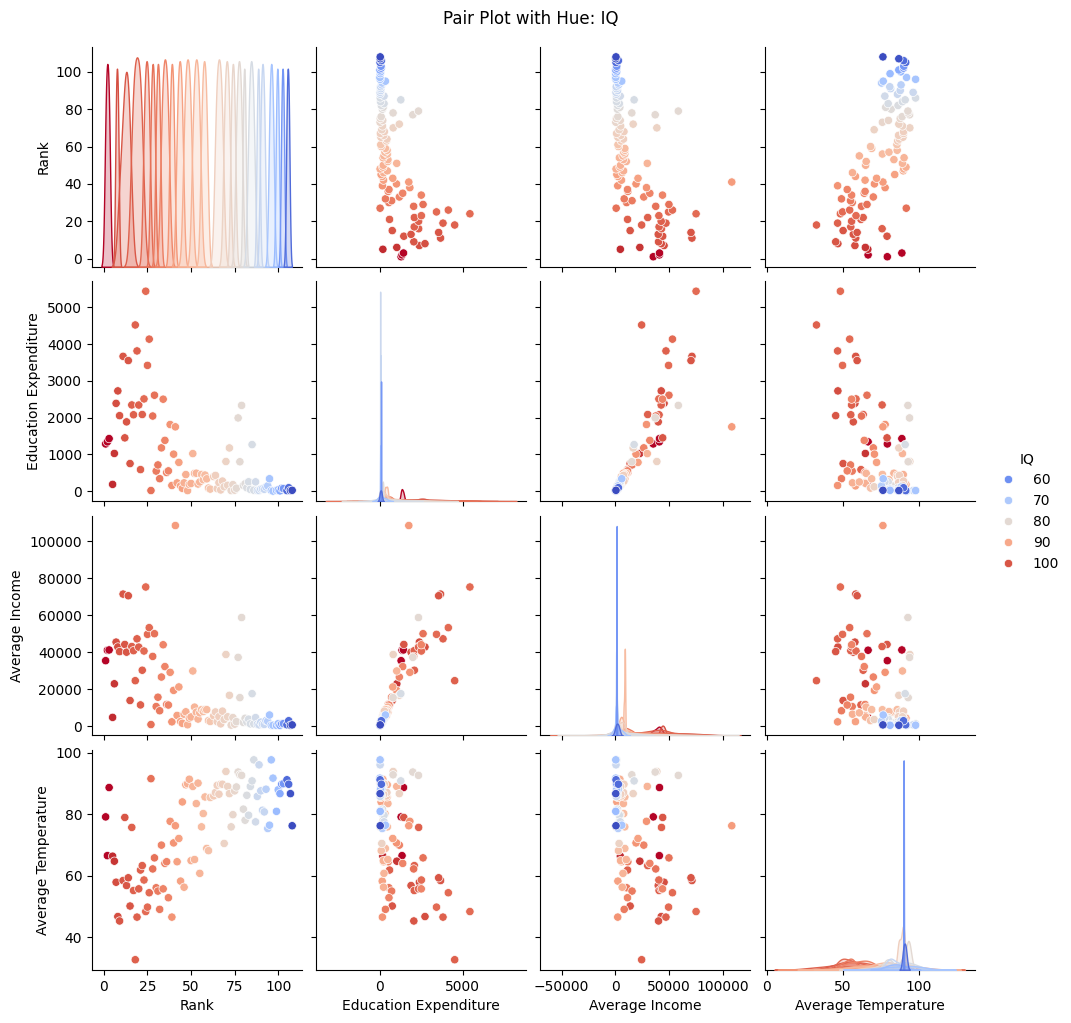

In [29]:
# A plot with visualizations that compare each column.

pairplot_function(df, "IQ")

In [30]:
# In preperation of the heat map drop non-numerical columns.   Should this be added to the key functions?

corr_df = df.drop(['Country', 'Rank'], axis=1)

<Axes: >

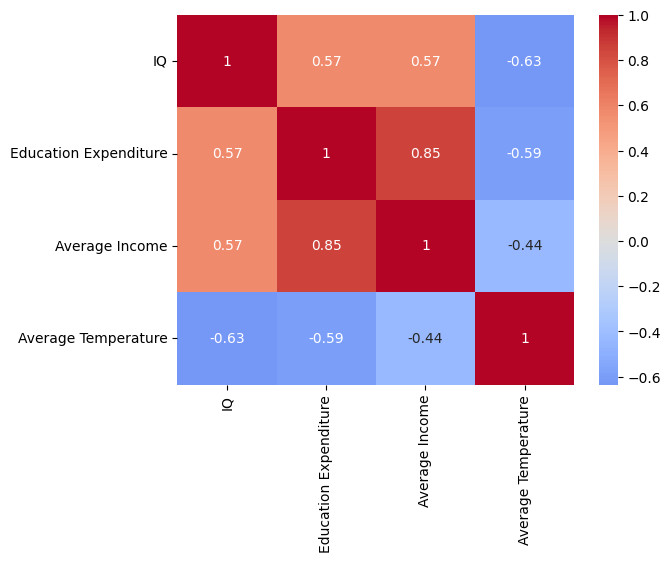

In [31]:
# A heatmap to compare corrolations with the data

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)


In [32]:
# a table to look at corrolations with the data

corr_function(df)

,IQ,Education Expenditure,Average Income,Average Temperature
IQ,1.000000,0.568237,0.572507,-0.634653
Education Expenditure,0.568237,1.000000,0.854779,-0.591675
Average Income,0.572507,0.854779,1.000000,-0.436166
Average Temperature,-0.634653,-0.591675,-0.436166,1.000000


**Correlation and Causation:**  

  The degree of correlation between two or more variables can be determined using correlation. However, it does not consider the cause-and-effect relationship between variables. If two variables are correlated, it could be for any of the following reasons:
    
    1. **Third-Party Influence:**   The influence of a third party can result in  
                                  a high degree of correlation between the two variables.
    
    2. **Mutual Dependence (Cause and Effect):**  It may be challenging to  
                                              determine which is the cause, and which is the effect when two variables indicate a high degree of correlation.
    
    
    3. **Pure Chance: **  It is possible that the correlation between the two
                    variables was obtained by random chance or coincidence alone.

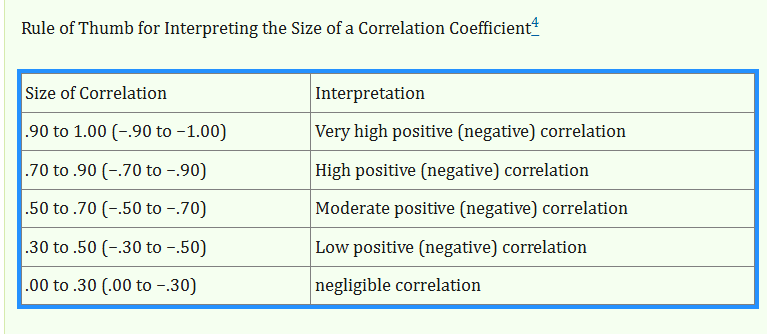

# **Step 6: Check for Outliers**

In data analytics outliers are values that vary greatly from the others.  In data science these are removed to avoid the data model being skewed.  Do to the size of this model the outliers are noted, but will not be analyzed.       

**Univariate Analysis**
- Objective: Dive deeper into the distribution of individual features.
- Activity:
Plot histograms or density plots for numerical variables.
Explore box plots to visualize potential outliers.
Discuss distribution shapes (e.g., normal, skewed) and their implications.


**Handling Outliers**
- Objective: Understand the importance of identifying and handling outliers.
- Activity: Identify outliers using statistical methods (e.g., Z-score, IQR).
Show how to either remove, adjust, or flag outliers based on context.

Here boxplots are used to determine outliers


**IQ**

<Axes: ylabel='IQ'>

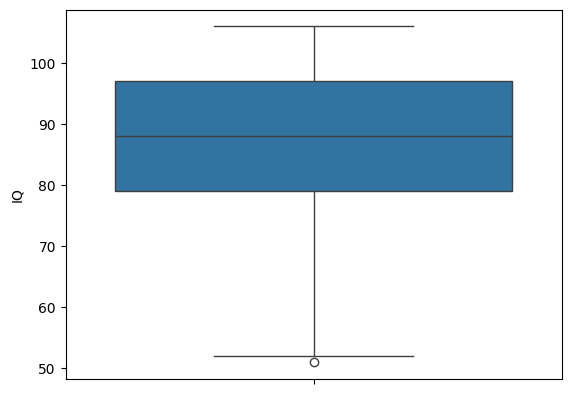

In [33]:
# Boxplot to look at the IQ range.

sns.boxplot(df['IQ'])

In [34]:
# Interquartile, it's range, lower bound and upper bound for IQ.

q1, q3, iqr = quantile_function(df, "IQ")

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

Q1: 79.0
Q3: 97.0
IQR: 18.0


(52.0, 124.0)

**Education Expenditure**

<Axes: ylabel='Education Expenditure'>

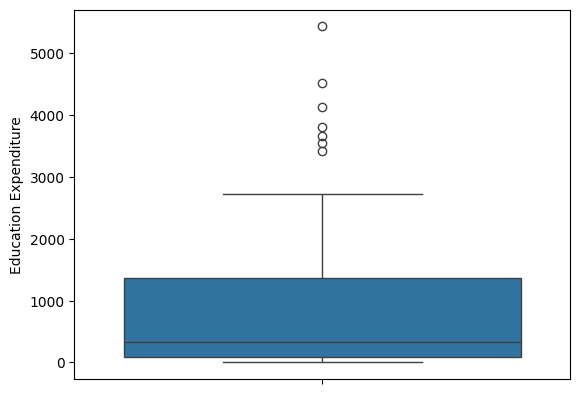

In [35]:
# Boxplot to look at the education expenditure range and outliers.

sns.boxplot(df['Education Expenditure'])

In [36]:
# Interquartile, it's range, lower bound and upper bound for education expenditure.

q1, q3, iqr = quantile_function(df, 'Education Expenditure')

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

Q1: 81.5
Q3: 1360.0
IQR: 1278.5


(-1836.25, 3277.75)

**Average Income**


<Axes: ylabel='Average Income'>

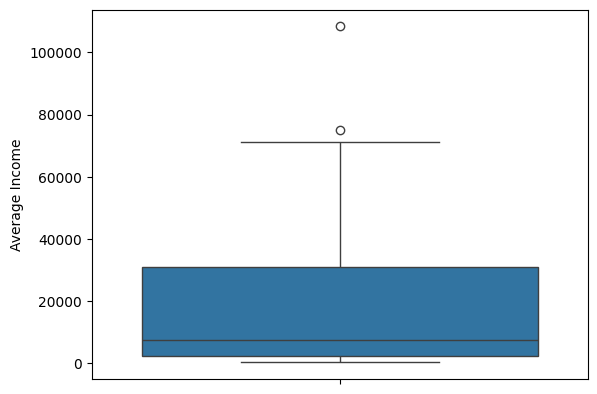

In [37]:
# Boxplot to look at the average income range and outliers.

sns.boxplot(df['Average Income'])

In [38]:
# Interquartile, it's range, lower bound and upper bound for average income.

q1, q3, iqr = quantile_function(df, 'Average Income')

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

Q1: 2285.5
Q3: 31122.5
IQR: 28837.0


(-40970.0, 74378.0)

**Average Temperature**


<Axes: ylabel='Average Temperature'>

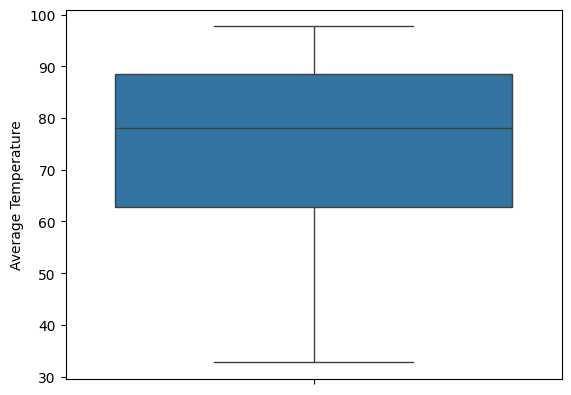

In [39]:
# Boxplot to look at the average temperature range and outliers.

sns.boxplot(df['Average Temperature'])

In [40]:
# Interquartile, it's range, lower bound and upper bound for average temperature.

q1, q3, iqr = quantile_function(df, 'Average Temperature')

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

Q1: 62.78
Q3: 88.43
IQR: 25.650000000000006


(24.304999999999993, 126.90500000000002)

# **Step 7: Summarize Patterns and in Data**

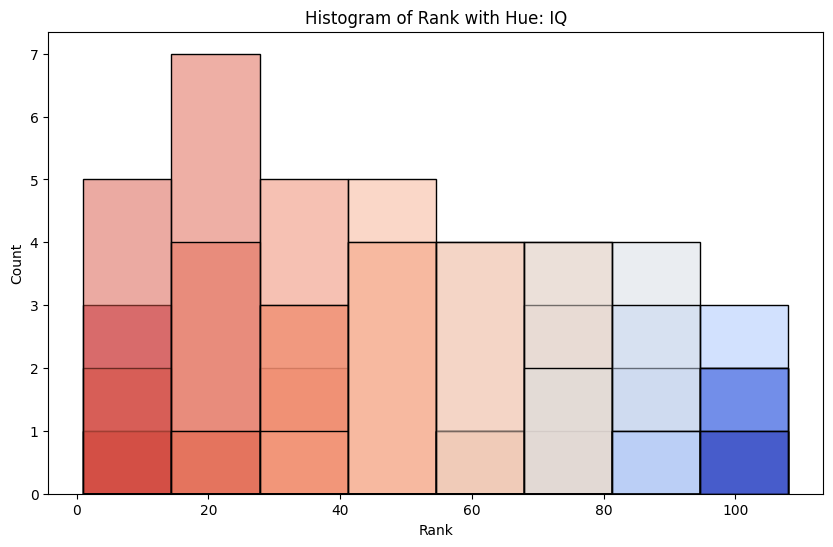

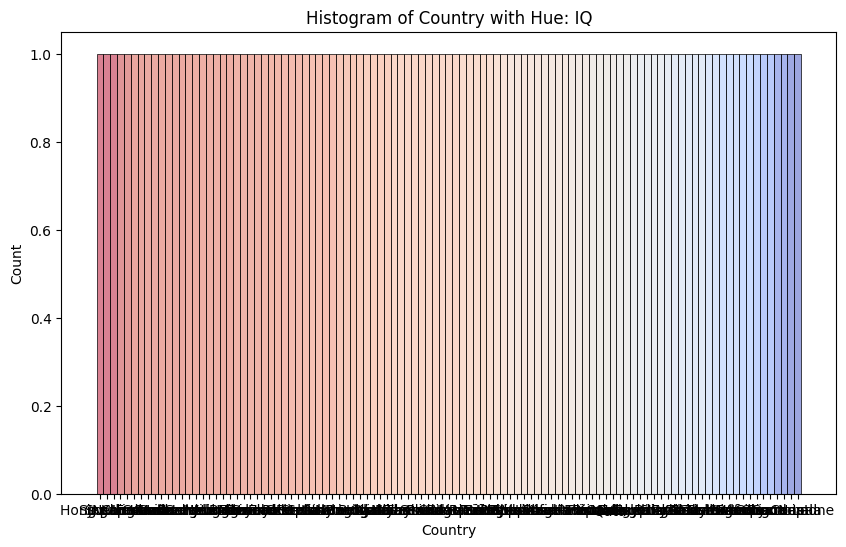

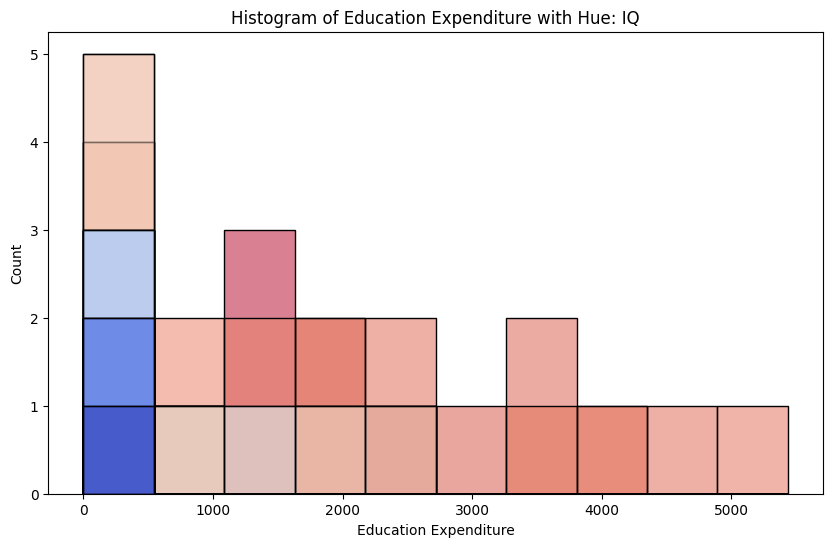

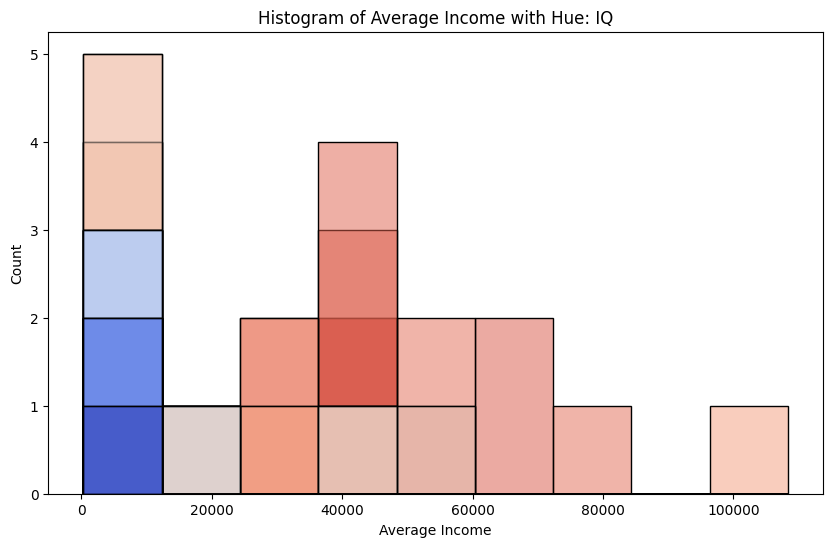

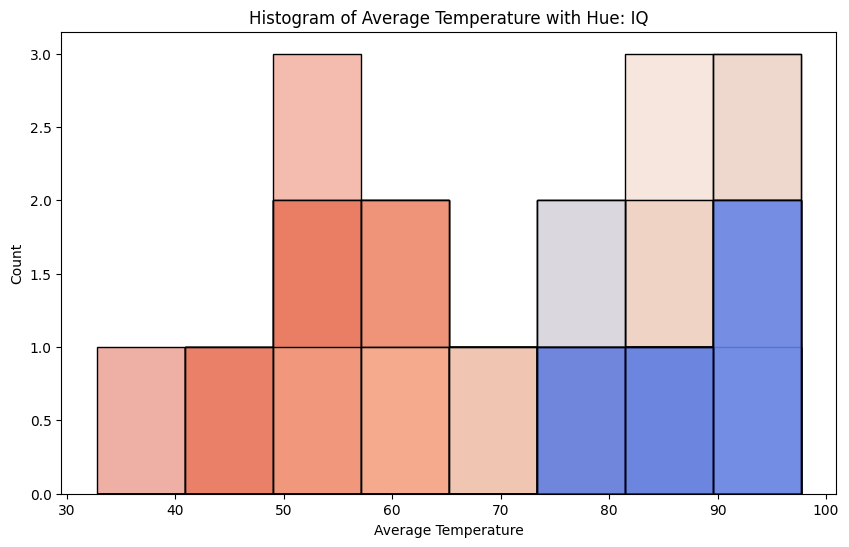

In [41]:
# a histogram of the measure columns to see if patterms can be determined.

df.drop(['Country', 'Rank'], axis=1)
histplot_column_function(df, "IQ")

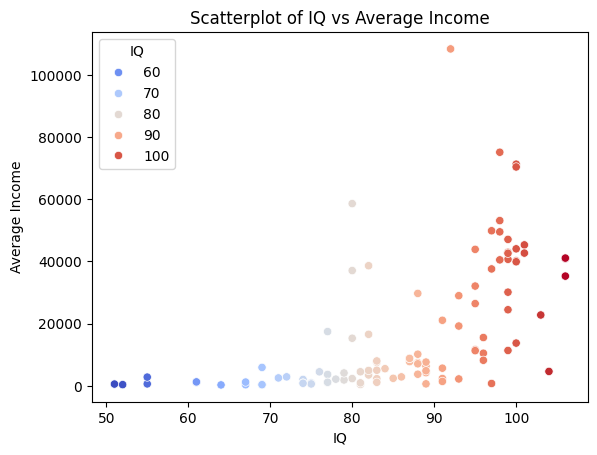

In [42]:
# a scatter plot to look at average income verses IQ scores

scatter_plotter_variables(df, "IQ", "Average Income")

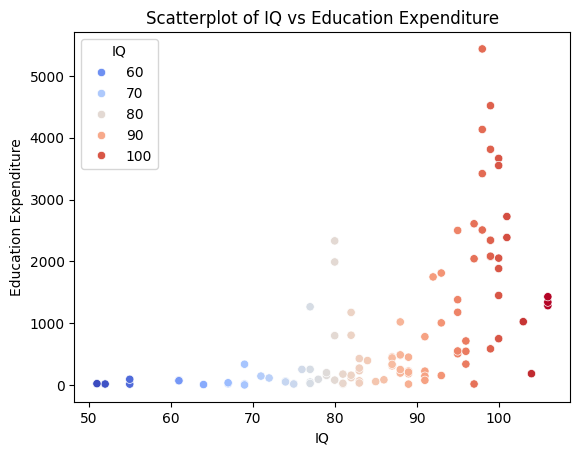

In [43]:
# a scatter plot to look at education expenditure verses IQ scores

scatter_plotter_variables(df,  "IQ", "Education Expenditure")

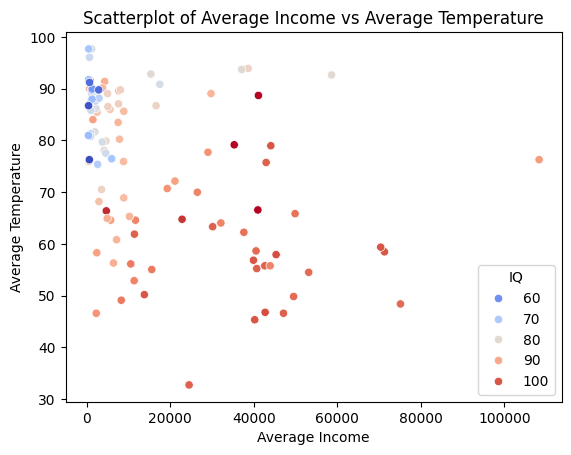

In [44]:
# a scatter plot to look at average temperature verses average income

scatter_plotter_variables(df, "Average Income", "Average Temperature")

Final Statement:

This concludes this analysis. The findings are detailed in the executive summary.  